# Importing

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
params = {'axes.titlesize':'18',
          'xtick.labelsize':'18',
          'ytick.labelsize':'18',
          'font.size':'20',
          'legend.fontsize':'medium',
          'lines.linewidth':'2.5',
          'font.weight':'normal',
          'lines.markersize':'14',
          'text.latex.preamble': r'\usepackage{amsfonts}',
          'lines.markerfacecolor':'none'
          }
matplotlib.rcParams.update(params)
plt.rcParams["mathtext.fontset"] = "cm"
plt.rc('text', usetex=True) # set to False if no tex installed in your machine
plt.rc('font', family='serif')

# Parameters

In [2]:
lst_eps = [0.25, 0.5, 1, 2, 4, 8, 10, 20, 50] # epsilon-LDP values

fig_size = (16, 9)
bbox = (-0.09, 1.625)

# Appendix Results: Random number of sensitive attributes

## Performance Metrics

Dataset: adult


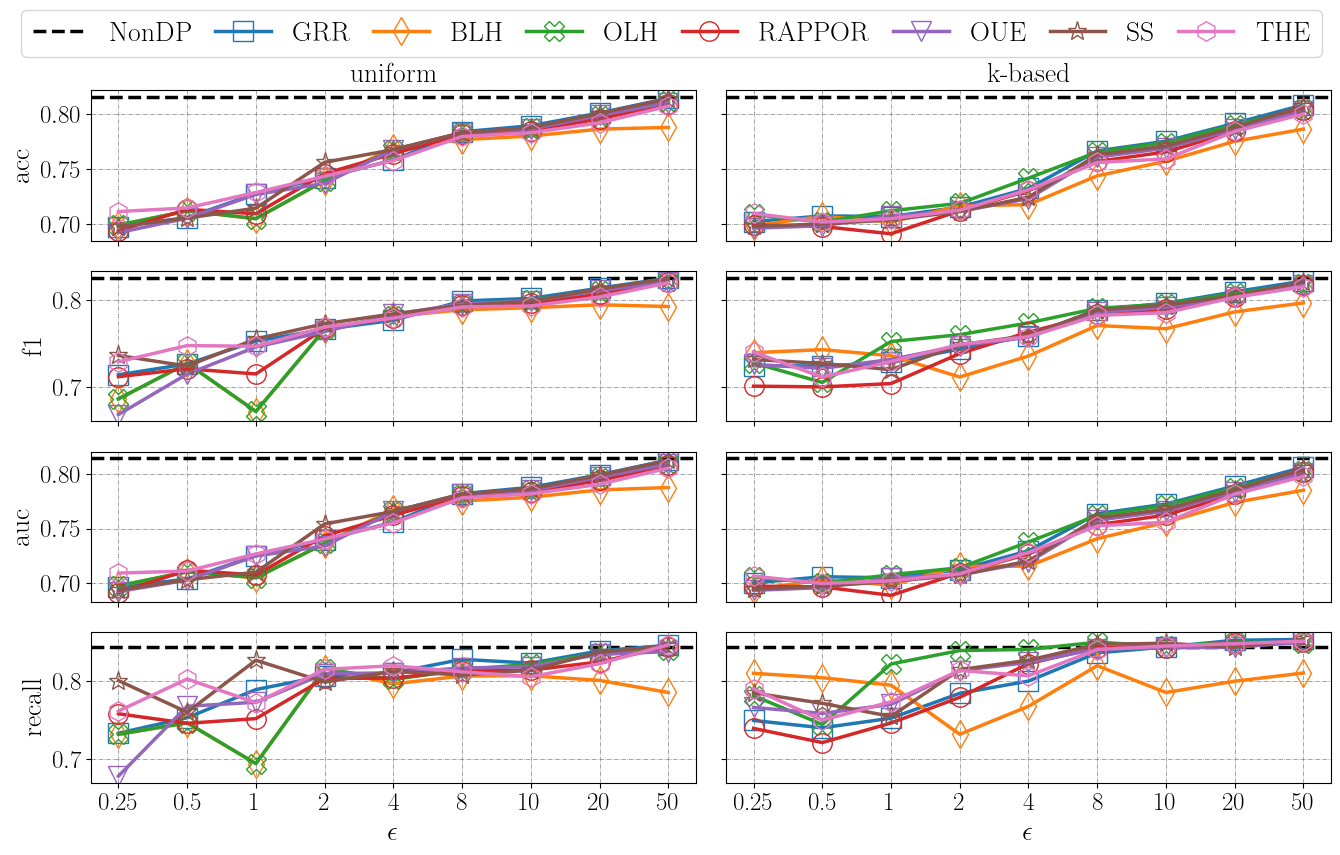

Dataset: ACSCoverage


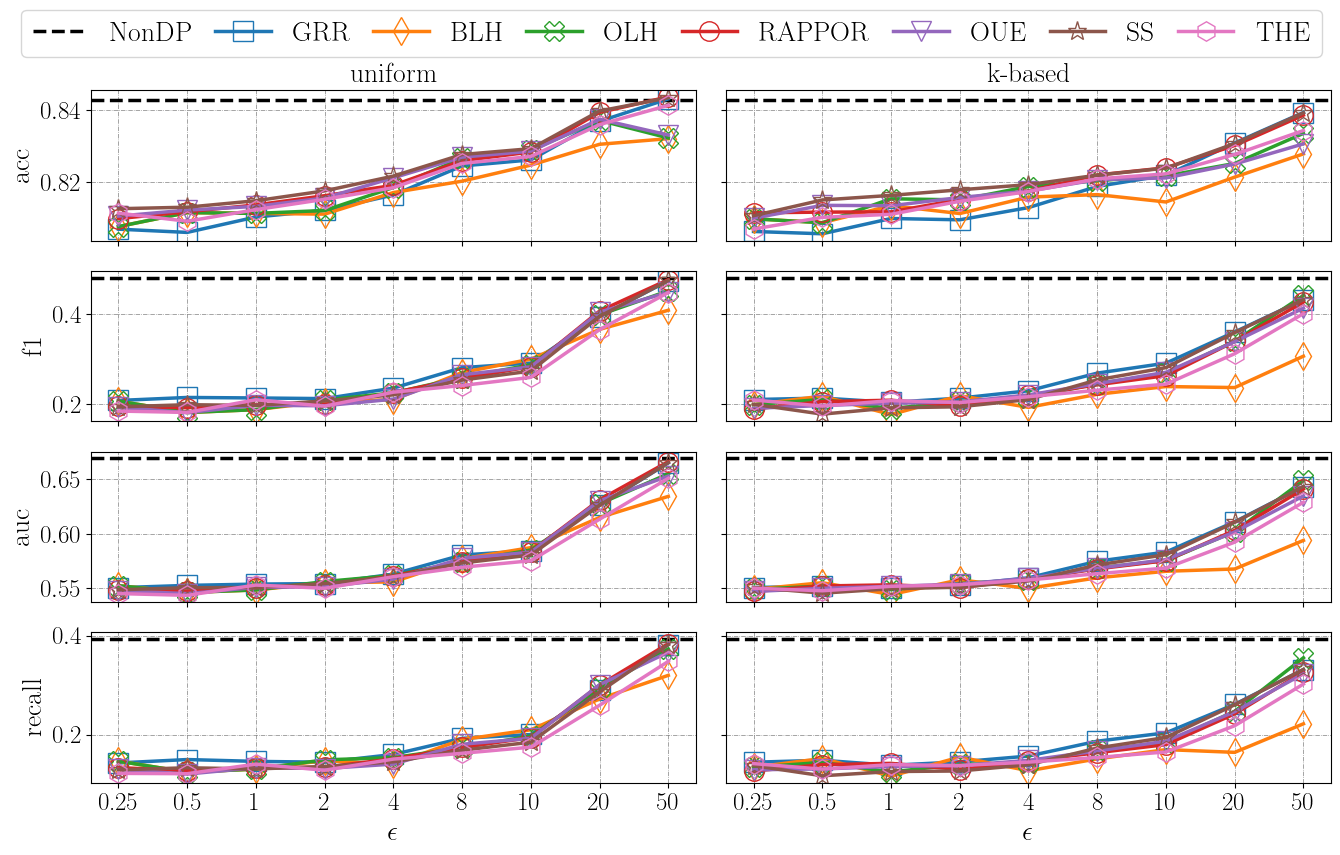

Dataset: LSAC


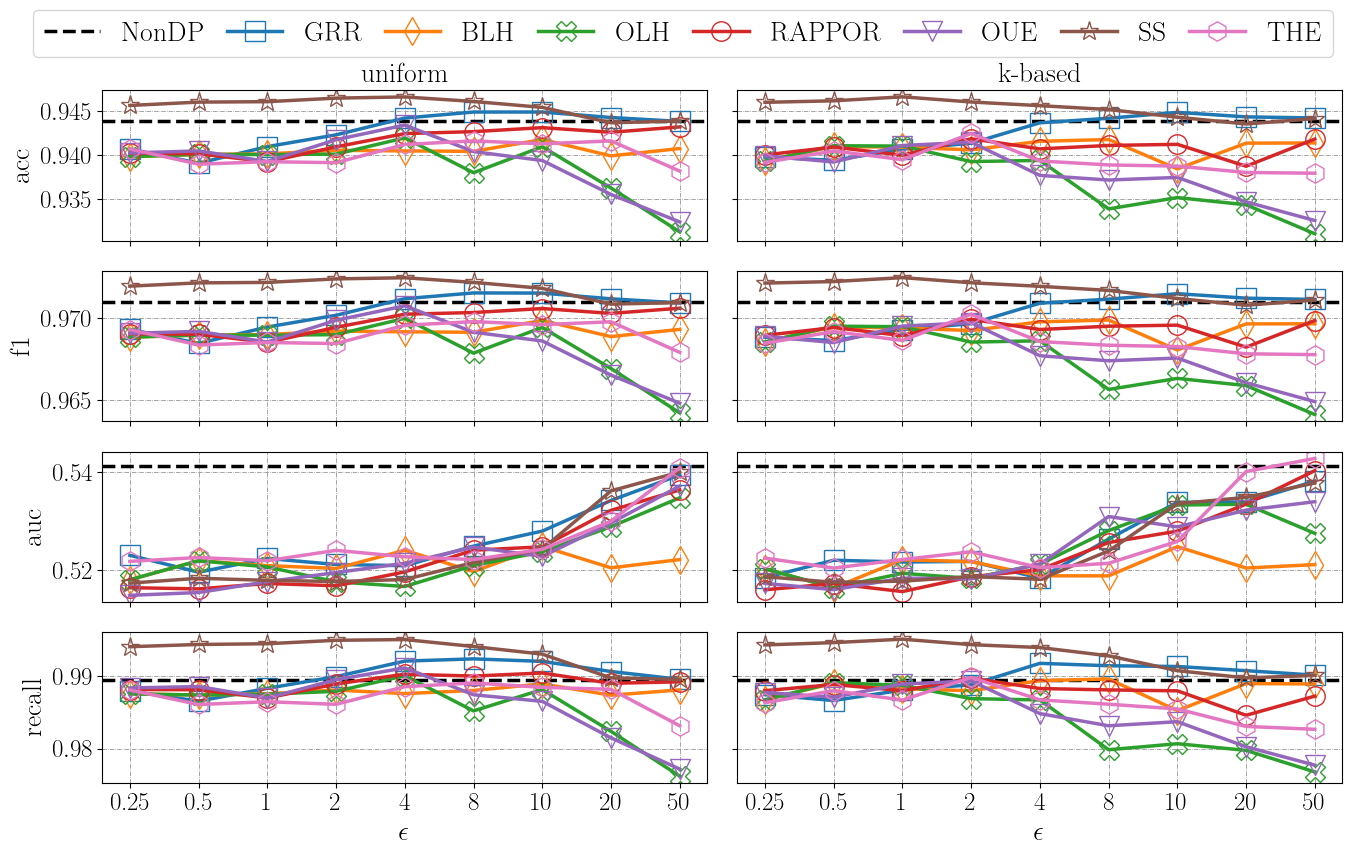

In [3]:
ml_model = 'LGBM' 
analysis = 'utility'
metrics = ["acc", "f1", "auc", "recall"]

for dataset in ['adult', 'ACSCoverage', 'LSAC']:
    
    fig, ax = plt.subplots(4, 2, figsize=fig_size, sharey='row')
    plt.subplots_adjust(wspace=0.05, hspace=0.2)
    r = 0 # row
    c = 0 # column
    
    for split_strategy in ['uniform', 'k_based']:

        if r>1 and c==0:
            r=0
            c=1
        for metric in metrics:
            
            resul_non_private = pd.read_csv('results/'+dataset+'/non_private/'+ml_model+'_results_non_private.csv', usecols=[metric]).values
            resul_GRR = [pd.read_csv('results/'+dataset+'/GRR/'+split_strategy+'/Appendix_'+ml_model+'_results_GRR_eps_{}.csv'.format(epsilon), usecols=[metric]).values.astype(float) for epsilon in lst_eps]
            resul_BLH = [pd.read_csv('results/'+dataset+'/BLH/'+split_strategy+'/Appendix_'+ml_model+'_results_BLH_eps_{}.csv'.format(epsilon), usecols=[metric]).values.astype(float) for epsilon in lst_eps]
            resul_OLH = [pd.read_csv('results/'+dataset+'/OLH/'+split_strategy+'/Appendix_'+ml_model+'_results_OLH_eps_{}.csv'.format(epsilon), usecols=[metric]).values.astype(float) for epsilon in lst_eps]
            resul_SUE = [pd.read_csv('results/'+dataset+'/SUE/'+split_strategy+'/Appendix_'+ml_model+'_results_SUE_eps_{}.csv'.format(epsilon), usecols=[metric]).values.astype(float) for epsilon in lst_eps]
            resul_OUE = [pd.read_csv('results/'+dataset+'/OUE/'+split_strategy+'/Appendix_'+ml_model+'_results_OUE_eps_{}.csv'.format(epsilon), usecols=[metric]).values.astype(float) for epsilon in lst_eps]
            resul_SS = [pd.read_csv('results/'+dataset+'/SS/'+split_strategy+'/Appendix_'+ml_model+'_results_SS_eps_{}.csv'.format(epsilon), usecols=[metric]).values.astype(float) for epsilon in lst_eps]
            resul_THE = [pd.read_csv('results/'+dataset+'/THE/'+split_strategy+'/Appendix_'+ml_model+'_results_THE_eps_{}.csv'.format(epsilon), usecols=[metric]).values.astype(float) for epsilon in lst_eps]

            ax[r, c].grid(color='grey', linestyle='dashdot', linewidth=0.5)
            ax[r, c].axhline(np.mean(resul_non_private), label='NonDP', color ='black', linestyle='dashed')
            ax[r, c].plot(np.mean(resul_GRR, axis=1), label='GRR', marker='s', linestyle='solid')
            ax[r, c].plot(np.mean(resul_BLH, axis=1), label='BLH', marker='d', linestyle='solid')
            ax[r, c].plot(np.mean(resul_OLH, axis=1), label='OLH', marker='X', linestyle='solid')
            ax[r, c].plot(np.mean(resul_SUE, axis=1), label='RAPPOR', marker='o', linestyle='solid')
            ax[r, c].plot(np.mean(resul_OUE, axis=1), label='OUE', marker='v', linestyle='solid')
            ax[r, c].plot(np.mean(resul_SS, axis=1),  label='SS', marker='*', linestyle='solid')
            ax[r, c].plot(np.mean(resul_THE, axis=1), label='THE', marker='h', linestyle='solid')
            
            ax[r, c].set_xticks(range(len(lst_eps)))
            ax[r, c].set_xticklabels([])
            
            ax[r, 0].set_ylabel(metric)
            r += 1

    print("Dataset:", dataset)
    print("==========================================================================================================================")
    ax[3, 0].set_xticks(range(len(lst_eps)))
    ax[3, 0].set_xticklabels([round(val,4) for val in lst_eps])
    ax[3, 1].set_xticks(range(len(lst_eps)))
    ax[3, 1].set_xticklabels([round(val,4) for val in lst_eps])
    ax[0, 0].set_title('uniform', fontsize = 20)
    ax[0, 1].set_title('k-based', fontsize = 20)
    ax[3, 0].set_xlabel("$\epsilon$")
    ax[3, 1].set_xlabel("$\epsilon$")
    ax[0, 1].legend(columnspacing=0.8, ncol=8, loc='upper center', bbox_to_anchor=bbox)
    plt.savefig('results/fig_appendix_'+analysis+'_'+dataset+'.pdf', dpi=500, bbox_inches = 'tight',pad_inches = 0.1)
    plt.show()

## Fairness Metrics

Dataset: adult


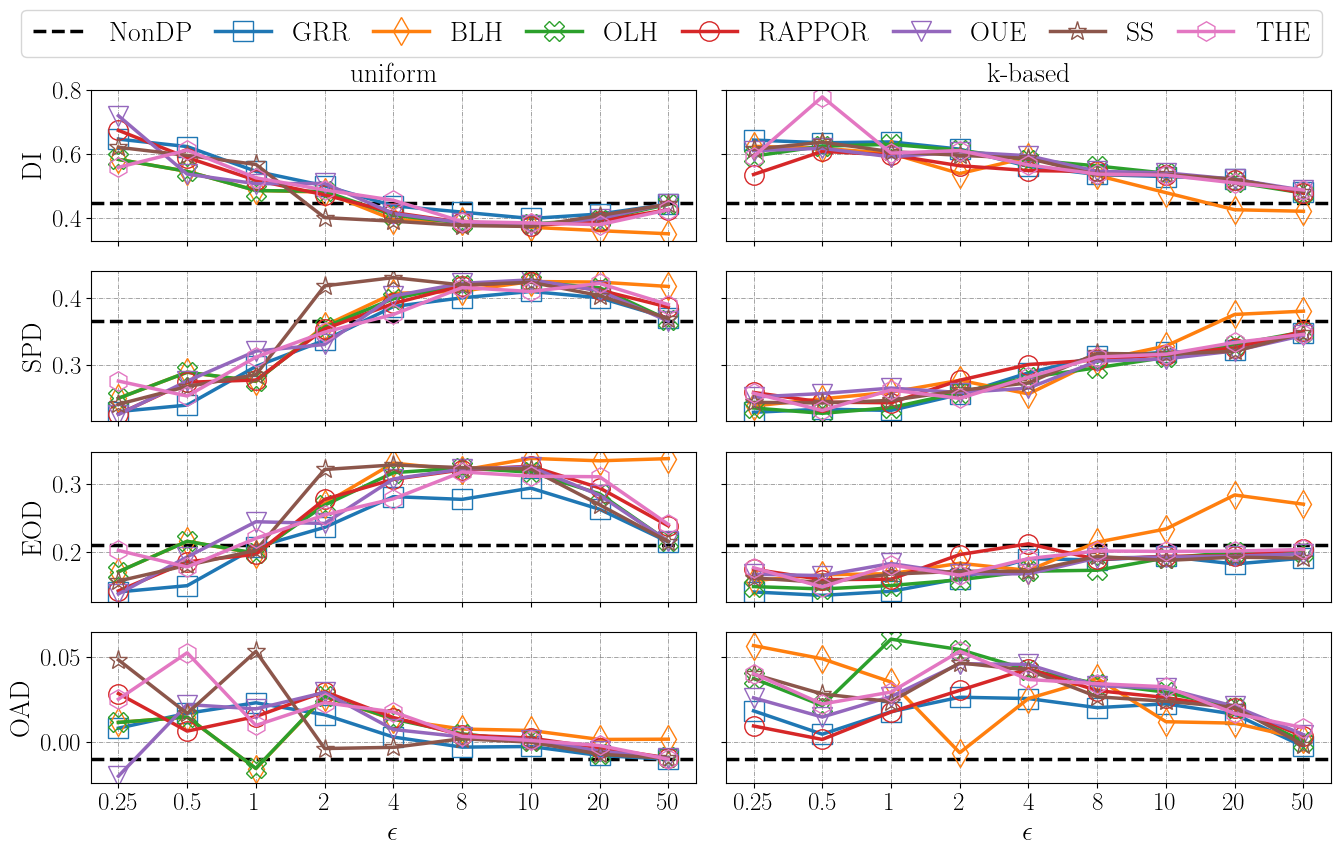

Dataset: ACSCoverage


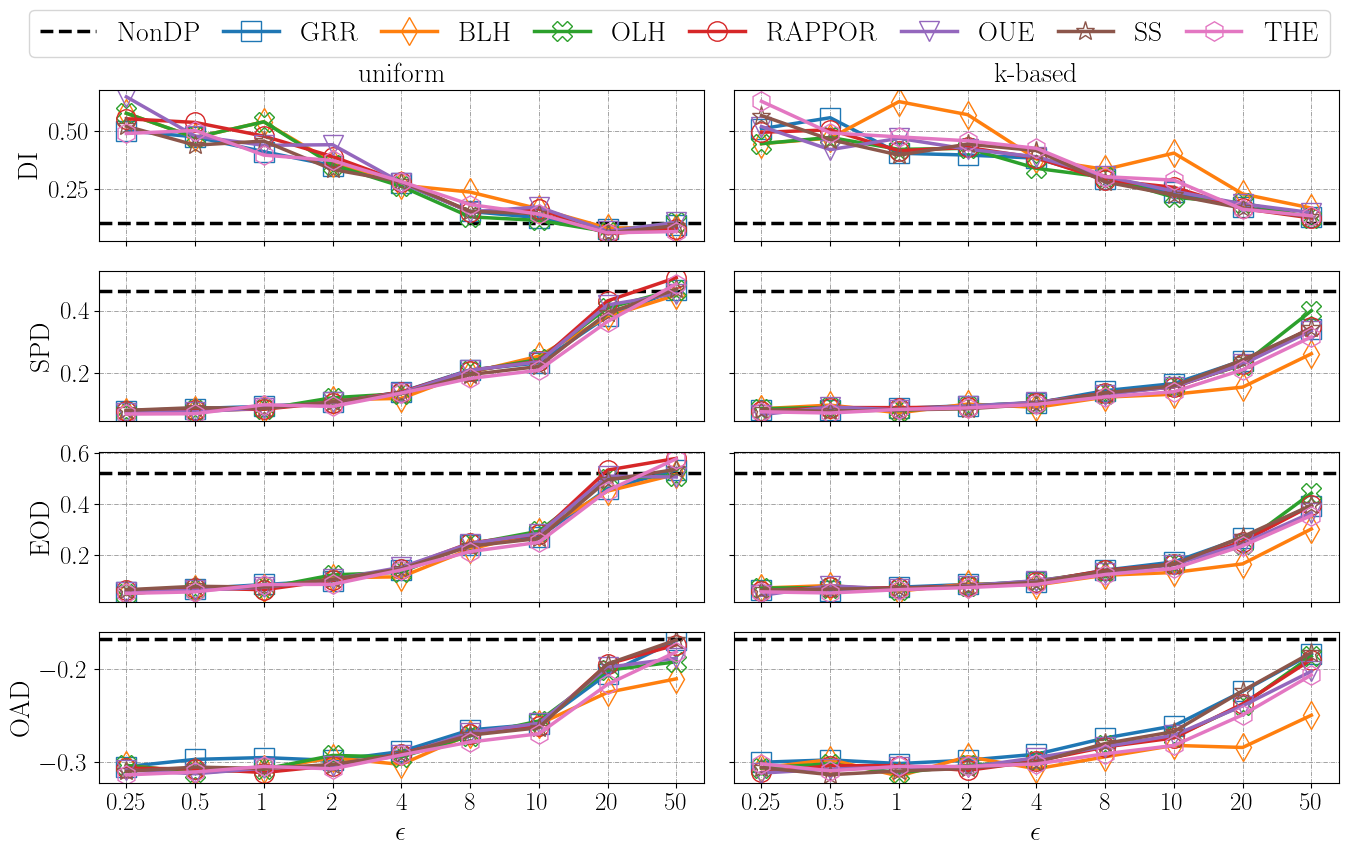

Dataset: LSAC


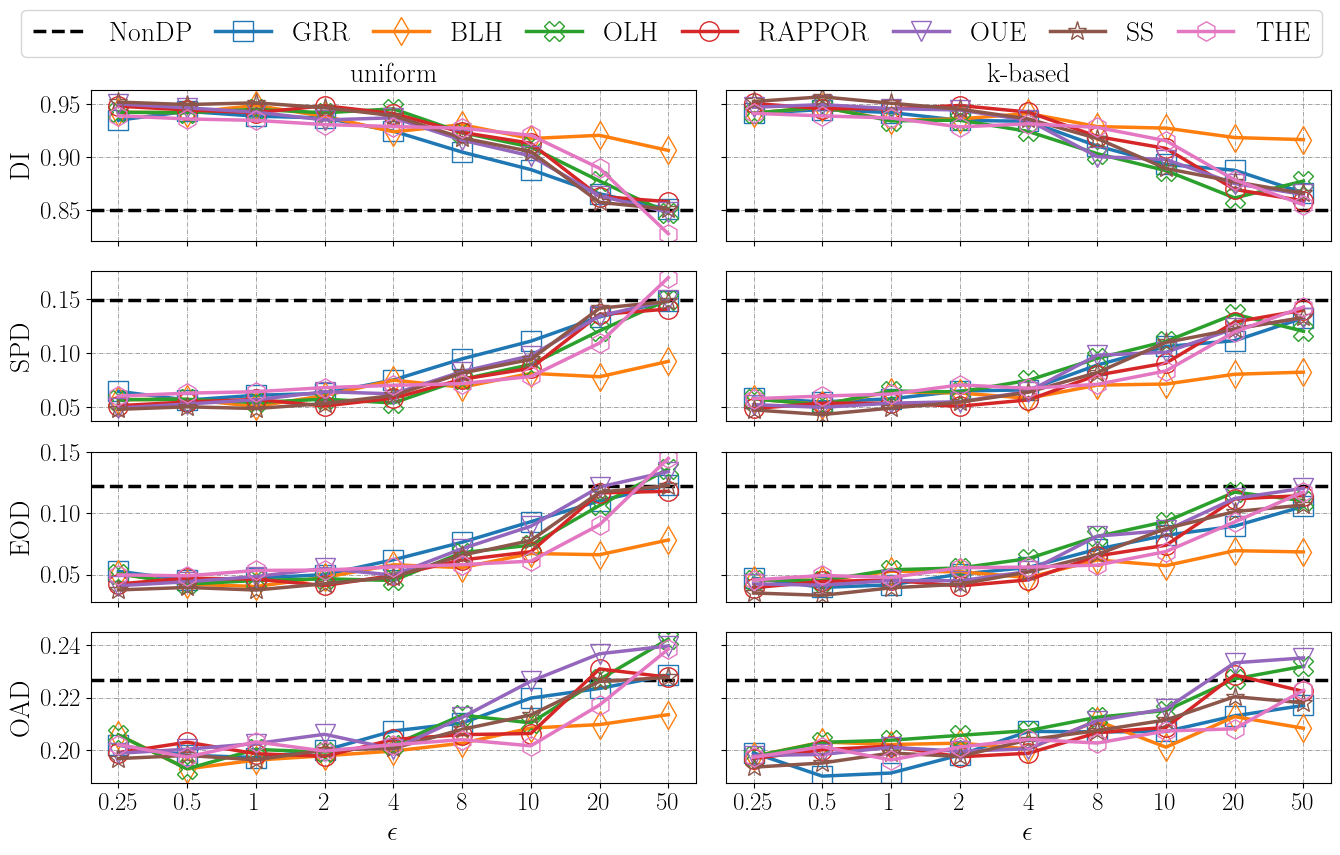

In [4]:
ml_model = 'LGBM' 
analysis = 'fairness'
metrics = ["DI", "SPD", "EOD", "OAD"]

for dataset in ['adult', 'ACSCoverage', 'LSAC']:
    
    fig, ax = plt.subplots(4, 2, figsize=fig_size, sharey='row')
    plt.subplots_adjust(wspace=0.05, hspace=0.2)
    r = 0 # row
    c = 0 # column
    
    for split_strategy in ['uniform', 'k_based']:

        if r>1 and c==0:
            r=0
            c=1
        for metric in metrics:
            
            resul_non_private = pd.read_csv('results/'+dataset+'/non_private/'+ml_model+'_results_non_private.csv', usecols=[metric]).values
            resul_GRR = [pd.read_csv('results/'+dataset+'/GRR/'+split_strategy+'/Appendix_'+ml_model+'_results_GRR_eps_{}.csv'.format(epsilon), usecols=[metric]).values.astype(float) for epsilon in lst_eps]
            resul_BLH = [pd.read_csv('results/'+dataset+'/BLH/'+split_strategy+'/Appendix_'+ml_model+'_results_BLH_eps_{}.csv'.format(epsilon), usecols=[metric]).values.astype(float) for epsilon in lst_eps]
            resul_OLH = [pd.read_csv('results/'+dataset+'/OLH/'+split_strategy+'/Appendix_'+ml_model+'_results_OLH_eps_{}.csv'.format(epsilon), usecols=[metric]).values.astype(float) for epsilon in lst_eps]
            resul_SUE = [pd.read_csv('results/'+dataset+'/SUE/'+split_strategy+'/Appendix_'+ml_model+'_results_SUE_eps_{}.csv'.format(epsilon), usecols=[metric]).values.astype(float) for epsilon in lst_eps]
            resul_OUE = [pd.read_csv('results/'+dataset+'/OUE/'+split_strategy+'/Appendix_'+ml_model+'_results_OUE_eps_{}.csv'.format(epsilon), usecols=[metric]).values.astype(float) for epsilon in lst_eps]
            resul_SS = [pd.read_csv('results/'+dataset+'/SS/'+split_strategy+'/Appendix_'+ml_model+'_results_SS_eps_{}.csv'.format(epsilon), usecols=[metric]).values.astype(float) for epsilon in lst_eps]
            resul_THE = [pd.read_csv('results/'+dataset+'/THE/'+split_strategy+'/Appendix_'+ml_model+'_results_THE_eps_{}.csv'.format(epsilon), usecols=[metric]).values.astype(float) for epsilon in lst_eps]

            ax[r, c].grid(color='grey', linestyle='dashdot', linewidth=0.5)
            ax[r, c].axhline(np.mean(resul_non_private), label='NonDP', color ='black', linestyle='dashed')
            ax[r, c].plot(np.mean(resul_GRR, axis=1), label='GRR', marker='s', linestyle='solid')
            ax[r, c].plot(np.mean(resul_BLH, axis=1), label='BLH', marker='d', linestyle='solid')
            ax[r, c].plot(np.mean(resul_OLH, axis=1), label='OLH', marker='X', linestyle='solid')
            ax[r, c].plot(np.mean(resul_SUE, axis=1), label='RAPPOR', marker='o', linestyle='solid')
            ax[r, c].plot(np.mean(resul_OUE, axis=1), label='OUE', marker='v', linestyle='solid')
            ax[r, c].plot(np.mean(resul_SS, axis=1),  label='SS', marker='*', linestyle='solid')
            ax[r, c].plot(np.mean(resul_THE, axis=1), label='THE', marker='h', linestyle='solid')
            
            ax[r, c].set_xticks(range(len(lst_eps)))
            ax[r, c].set_xticklabels([])
            
            ax[r, 0].set_ylabel(metric)
            r += 1

    print("Dataset:", dataset)
    print("==========================================================================================================================")
    ax[3, 0].set_xticks(range(len(lst_eps)))
    ax[3, 0].set_xticklabels([round(val,4) for val in lst_eps])
    ax[3, 1].set_xticks(range(len(lst_eps)))
    ax[3, 1].set_xticklabels([round(val,4) for val in lst_eps])
    ax[0, 0].set_title('uniform', fontsize = 20)
    ax[0, 1].set_title('k-based', fontsize = 20)
    ax[3, 0].set_xlabel("$\epsilon$")
    ax[3, 1].set_xlabel("$\epsilon$")
    ax[0, 1].legend(columnspacing=0.8, ncol=8, loc='upper center', bbox_to_anchor=bbox)
    plt.savefig('results/fig_appendix_'+analysis+'_'+dataset+'.pdf', dpi=500, bbox_inches = 'tight',pad_inches = 0.1)
    plt.show()